# What Caused the Salem Witch Trials?

# Introduction

While searching for a dataset for this project, I found a dataset on juvenile arrest records. However, this dataset proved to be extremely difficult to work with to create data visualizations, so I looked for another. Also, I wasn't really invested in juvenile arrest records. However a topic that has always been of interest to me is the Salem Witch Trials. Specifically, I’ve always been intrigued by different theories as to what caused the Salem Witch Trials to occur.  Eventually, I came across a group of datasets that pertained to the Salem Witch Trials. After looking through the datasets, I concluded that they would be relatively easy to work with to create multiple visualizations, and they would help me gain some insight into what may have caused the Salem Witch Trials. Following my initial study of the datasets, I had a few questions I hoped to answer. The datasets focused on the Anti-Parris and Pro-Parris petitions. The Anti-Parris petition sought to pressure Parris into stepping down while the Pro-Parris petition was a retaliation to the Anti-Parris petition. Generally, Anti-Parris signers did not approve of the Salem Witch Trials while Pro-Parris signers did approve. With that being said, my question was as follows: During the Salem Witch Trials, what are the relationships between gender, wealth, and church membership on whether or not a given member of the Salem community and committee will sign either Parris petition? However, as I created my visualizations, I had to refine my question. One dataset I was relying on was a dataset that showed the taxes each villager paid each year. This dataset proved to have too many missing values, and it would not have given accurate results had I gone through with using it. That part of my question had to be removed entirely. Also, after creating a visualization of the months in which the accused were executed, I found that as the weather got colder, the number of executions and accusations rose. This led me to consider how the weather might affect the fate of the accused. Could it be possible that seasonal depression led to the rise in executions? At this point, I had a few factors in consideration: relationship between church membership and which petition a given villager signed or if they didn’t sign, gender at the time of the petitions, identification of the villagers when signing or opting not to, and weather. All of these lead me to my final question: What could be responsible for the Salem Witch Trials?




# Transformations

My visualizations didn’t require too many transformations from the original datasets. The first three visualizations only required that I specify which column I wanted to create the graph from. For some of the other visualizations, I needed to get the value counts of different entries for specific columns in a particular dataset. Seaborn automatically did this for me when I created the bar graphs showing the breakdown of identification of the signers for both the Pro-Parris and Anti-Parris petition. However, when creating the bar graph showing breakdown of sex between signers the two petitions, I had to specify that I wanted the value counts from the column titled ‘Sex’ which appeared in both datasets. Another transformation appears in this graph too. In order to create the bar graph that would show data from both the Anti-Parris and Pro-Parris datasets, I had to concatenate the two datasets. Specifically, I concatenated them by the ‘Sex’ column and their respective value counts. This gave me counts of how many men and women signed the Pro-Parris and Anti-Parris petitions while separating the categories between the petitions. This allowed me to easily create a bar graph displaying both sets of value counts. My final visualization of the network graph required that I create nodes and edges out of the rows of the village dataset. The nodes were the names of the villagers, how they related to the church (member or non-member), and what petition they signed or if they didn’t sign. Each name connected to a church and petition node depending on what the dataset said they corresponded to. 


# Dictionary

Anti-Parris Petition: Aimed to pressure Parris into stepping down. Generally means the signers didn’t support the Salem Witch Trials.

Pro-Parris Petition: Retaliation against Anti-Parris Petition by Parris' supporters. Generally means the signers supported the Salem Witch Trials.

Householder: Head of their household, not necessarily owning the land

Freeholder: Owned their land “free and clear”

Month of Accusation: Month that the person was accused. Represented with a number. A value of -1 means it is unclear what month the person was accused.

Month of Execution: Month that the person was executed. Represented with a number. A value of NA indicates that the person was not executed. 

Residence: Incidates which town the accused was from. 

Church Member: Indicates that this person was a member of the church. There is no distinction if this pertains to the Salem church or another church.

# Data Visualizations

In [14]:
%matplotlib inline
import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
accused=pd.read_csv('Accused-Witches-Data-Set.csv')
antiP=pd.read_csv('Anti-Parris-Social-Data-Set.csv')
proP=pd.read_csv('Pro-Parris-Social-Data-Set.csv')
village=pd.read_csv('Salem-Village-Data-Set.csv')

<AxesSubplot:xlabel='Month of Accusation', ylabel='Count'>

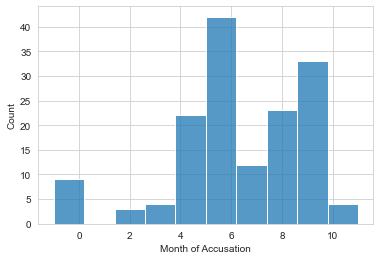

In [16]:
sns.histplot(accused['Month of Accusation'])

Histogram showing the number of witches accused for each month. A value of
-1 indicated insufficient evidence for a specific month of accusation


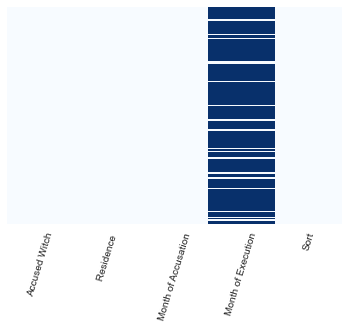

In [17]:
heatmap=sns.heatmap(accused.isnull(),yticklabels=False,cbar=False,cmap='Blues')
for item in heatmap.get_xticklabels():
    item.set_rotation(73)

Heatmap displaying the missing data from the Accused Witches dataset.
A value of NA for Month of Execution means that the accused was not
Executed (this does not include the accused that died in prison). Missing data shows up as dark blue.


Text(0.5, 0, 'Month of Execution')

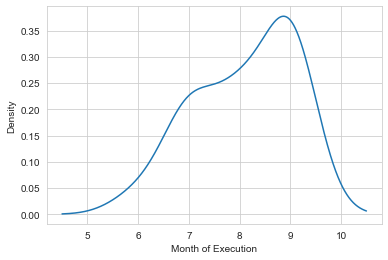

In [18]:
accused['Month of Execution'].plot.density()
plt.xlabel("Month of Execution")

Density plot showing the distribution of the amount of executions
per month. No executions occurred from December through April, so those months are not included.


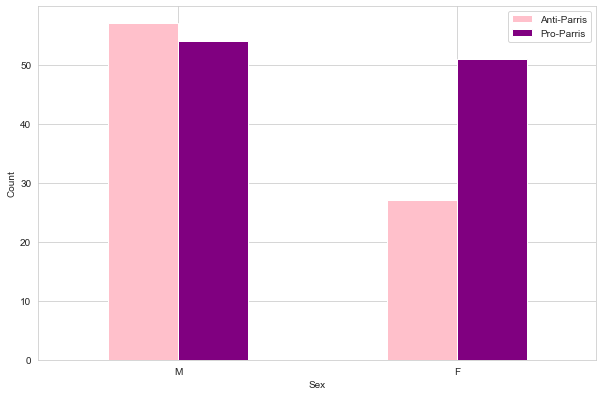

In [19]:
pd.concat({
    'Anti-Parris': antiP['Sex'].value_counts(), 'Pro-Parris': proP['Sex'].value_counts()
}, axis=1).plot.bar(figsize=(10,6.5), color=['pink','purple'],rot=0)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


Double bar graph showing the breakdown of sexes for each petition


[Text(0.5, 0, 'Pro-Parris Identification'), Text(0, 0.5, 'Count')]

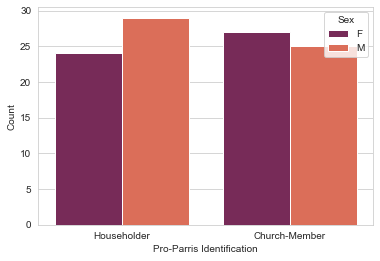

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Identification', hue='Sex', data=proP, palette='rocket').set(xlabel='Pro-Parris Identification', ylabel='Count')

Double bar graph showing the breakdown of sexes 
in relation to their identification when signing the Pro-Parris petition. Only householders and church members signed this petition.


[Text(0.5, 0, 'Anti-Parris Identification'), Text(0, 0.5, 'Count')]

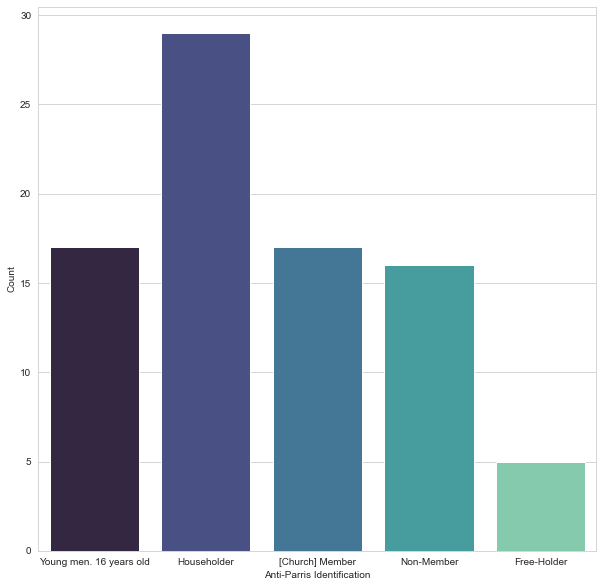

In [21]:
plt.figure(figsize=(10, 10))

sns.set_style('whitegrid')
sns.countplot(x='Identification', data=antiP, palette='mako').set(xlabel='Anti-Parris Identification', ylabel='Count')


Bar graph depicting the counts of different identifications for signers 
of the Anti-Parris petition.


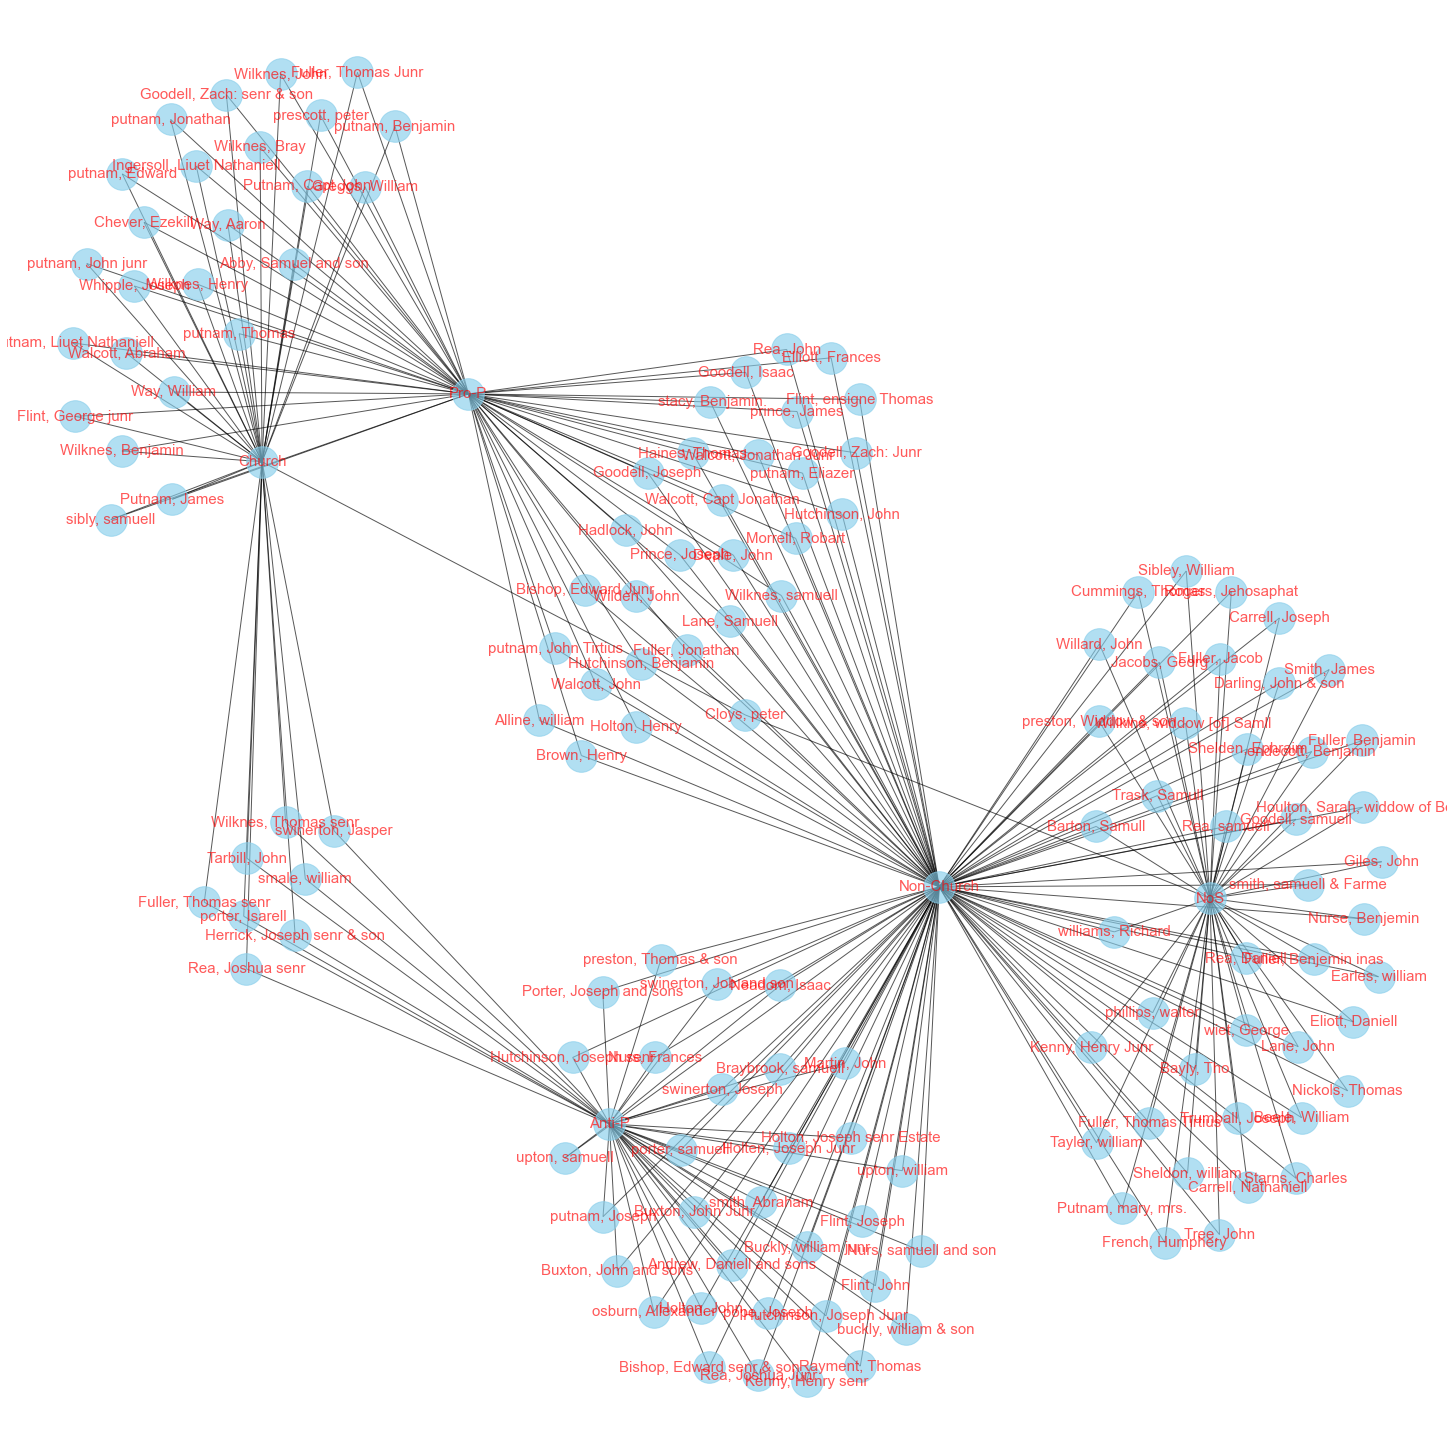

In [22]:
import networkx as nx

# Create graph
G = nx.Graph()
G.add_nodes_from(['Pro-P','Anti-P','NoS', 'Church', 'Non-Church'])

for idx, row in village.iterrows():
    G.add_node(row['Name'])
    G.add_edge(row['Name'], row['Petition'])
    G.add_edge(row['Name'], row['Church to 1696'])

plt.figure(figsize=(20,20)) 

nx.draw(G, with_labels=True,node_size=1000, font_size=15, alpha=0.65, node_color='skyblue', font_color='r')
plt.show()

Network graph showing whether villagers were church members or non-church members and which petition they signed or if they did not sign one. One church member (Cloys, Peter) did not sign a petition, so the edges span the entire graph making that person appear to be part of the non-church, Pro-Parris group when they are actually a church, non-signer.




# Conclusion



The visualizations I ended up choosing, I felt, offered insight into my question of what could have contributed to the Salem Witch Trials. When we look at the first few graphs, we see how the number of accusations and executions both have a peak in September. This was something that my peer reviewers picked up on and questioned. They wanted to know if there was a reason for this spike which is exactly what I wanted them to consider. Now, September is when Summer turns to Fall. The weather gets colder, and many people begin to experience mood changes. Many people experience Seasonal Affective Disorder, and it’s not implausible to say that some people from Salem may have also experienced it.  An article about the effect weather may have played on the Salem Witch Trials states, “The Salem Witch Trials fell within an extreme cold spell that lasted from 1680-1730.” (Live Science). The article also mentions how it’s possible that witchcraft was blamed for failed crops since some believed that witches could control the weather. Putting these two together along with the assumption that Seasonal Affective Disorder may have affected some of the people of Salem, it’s possible to say that the spike in accusations and executions were encouraged by that cold weather. Villagers become increasingly unhappy, and they look for someone to blame their misfortune on.
 
 

Some of the other things I noticed in my visualizations were that more women signed the Pro-Parris petition than the Anti-Parris petition. Also, more women than men signed the Pro-Parris petition. This was the opposite of what I expected when I started. I expected to see more men, especially more male church members to be supportive of Parris and the Salem Witch Trials. This brings to mind how some women who view themselves as superior will bring hate upon other women who they deem inferior to them.

The bar graphs that show the breakdown of identification of villagers in relation to the two petitions showed something interesting. For the Pro-Parris petition, only householders and church members signed it. However, a larger range of idenfitications signed the Anti-Parris petition. I debated including the Anti-Parris idenficiation graph, but I ultimately decided to keep it. It offers a bit of insight into how the peitions were distributed. The Pro-Parris petition circulated through Parris' followers, most of which were church members, and the Anti-Parris peition was for everyone else in the town. However, in the end, more people signed the Pro-Parris petition even though there was less diversity in identification. 

When looking at the network graph we see that of the non-churh members, the distribution of their relationship to the petitions is fairly even with a slight majority towards not signing and a slight minority towards Pro-Parris. However, of the church members, it is clear that a majority signed the Pro-Parris petition. Only a few signed the Anti-Parris petition, and a single church member did not sign either. From the sermon notebooks of Reverend Parris we read, "It may serve to Reprove such as seem to be amazed at the War the Devil has raised amongst us by Wizards, & Witches against the Lamb and his Followers that they altogether deny if. If ever there were Wirches, Men & Women in Covenant with the Devil, here are Multitudes in New-England. Nor is it so strange a thing there should be such; no nor that some Church Members should be such" (Parris, 154-155). Here we see how Parris would encourage his followers to believe in witchcraft and even suggest that it could be anyone. Later in the same notebook we read, "We may see here who they are that War against the Lamb, & his Followers. Why they are Devils, or Devils instruments. Here are but 2 parties in the World, the Lamb & his Followers, & the Dragon & his Followers: & these are contrary one to to the other. Well now they that are against the Lamb, against the Peace & Prosperity of Zion, the interest of Christ: They are for the Devil. Here are no Newters. Every one is on one side or the other" (Parris, 155). Parris encouraged a clear divide between good and evil in his sermons. Anyone hearing such sermons could easily be pursuaded to believe in witches within their town. The previous quote encourages a war and presses that their peace is at risk which would make anyone fearful. Taking these sermons into account, it is easy to see why a mojority of the church members would sign the Pro-Parris petition. They believed they were in danger, so they wanted to do something to stop it even if that meant jailing and executing their neighbors.  

With the assumptions one can make from the data visualizations, we must also consider how they may harm others. The assumption I made that some women deem other women to be inferior was in relation to women of the church, and that assumption can be harmful. Not all women of the church are like this, and the assumptions made from the data could enforce a generalization about a group of people which is never acceptable. Similarly, one may look at the network graph, see that most church members signed the Pro-Parris petition, and say that this means that members of the church support the killing of innocents. However, this does not take into account the aforementioned seromons that were very pursuasive at the time. The entire church is not responsible for what happened, and these results do not mean that the entire Puritan Church supports witch hunts.

As per suggestions from my peer reviewers, I ultimately rotated the labels of a few of my visualizations just to make them more readable. I also got rid of the line in the histogram because one of my reviewers pointed out to me that they didn’t understand what that was showing. After reviewing it myself, I realized that I didn’t need to include that line, and the histogram without the line still achieved the same purpose. See the below images for the original visualizaitons. 

<img src = "Missing-Data-for-Month-of-Execution.JPG">

<img src = "Gender-Breakdown-by-Petition.JPG">

<img src = "Month-of-Accusation-Histogram.JPG">

One suggestion that I played around with but was unable to make a reality was to modify the network graph. A reviewer suggested that I make it more readable, possibly by ridding the graph of the individual villager names. I tried a couple different methods of doing this, but neither left me with the result I wanted. First I tried recreating a network graph without the names of the villagers, but it left my category names scattered (see below). 

<img src = "Scattered-Labels.JPG">

After that, I created a directed network graph (see below). This worked to separate them and make it less messy, but the way they were grouped, it was difficult to see how many villagers were in each group. In the end, I decided to stick with my original network graph. However, this is something I would like to improve upon in the future because I do think that the graph, while insightful, is difficult to read. Sometimes the graph needs to be run multiplel times to get the groups seperated and not overlapping, and that is something that I think could be fixed in future iterations. However, I was not able to find anything that helped within the time given. 
 


<img src = "Directed-Graph.JPG">

With more revision, I would like to take advanatage of some of the other datasets. Specifically, I would like to apply what I did with the village dataset to another dataset that documented Salem's town committee. Seeing the same breakdowns but specifically for the committee could offer more evidence towards the narrative of what factors aided the Salem Witch Trials. It may show how their influence over the town played a part in the trials. Also, I would like to look into how geography played a part and what it could mean for the Salem Witch Trials. In the accused witches dataset, we were given what town they were accused in. Showing a geographical heatmap of where each person was accused could offer a different angle or more insight into the narrative we already have. It would also be interesting to see that heatmap compared to a heatmap of temepratures in September of 1692 which is when the spike in accusations and executions took place. If the areas with colder temperatures also had more accused witches, that would go a long way in supporting how the weather played into the Salem Witch Trials. 

# Works Cited

Parris, Samuel. “The Sermon Notebook of Samuel Parris: September 11, 1692: Salem Witch Trials.” The Sermon Notebook of Samuel Parris: September 11, 1692 | Salem Witch Trials, salem.lib.virginia.edu/sermons/parris16920911.html. 

Wolchover, Natalie. "Did Cold Weather Cause the Salem Witch Trials?" 20 Apr. 2012, www.livescience.com/19820-salem-witch-trials.html. 